In [1]:
import processing_functions as pf
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib
import scipy.stats as stats
import scipy.optimize as opt
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

In [2]:
lc1 = '/home/ravioli/astro/ksp/grb/data-0.1s/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q0.lc'
lc1_data = pf.openlc(lc1)
max_1 = int(np.where(lc1_data['RATE'] == np.max(lc1_data['RATE']))[0])
start = max_1-1100
end = max_1+220
print(start, end)

16911 18231


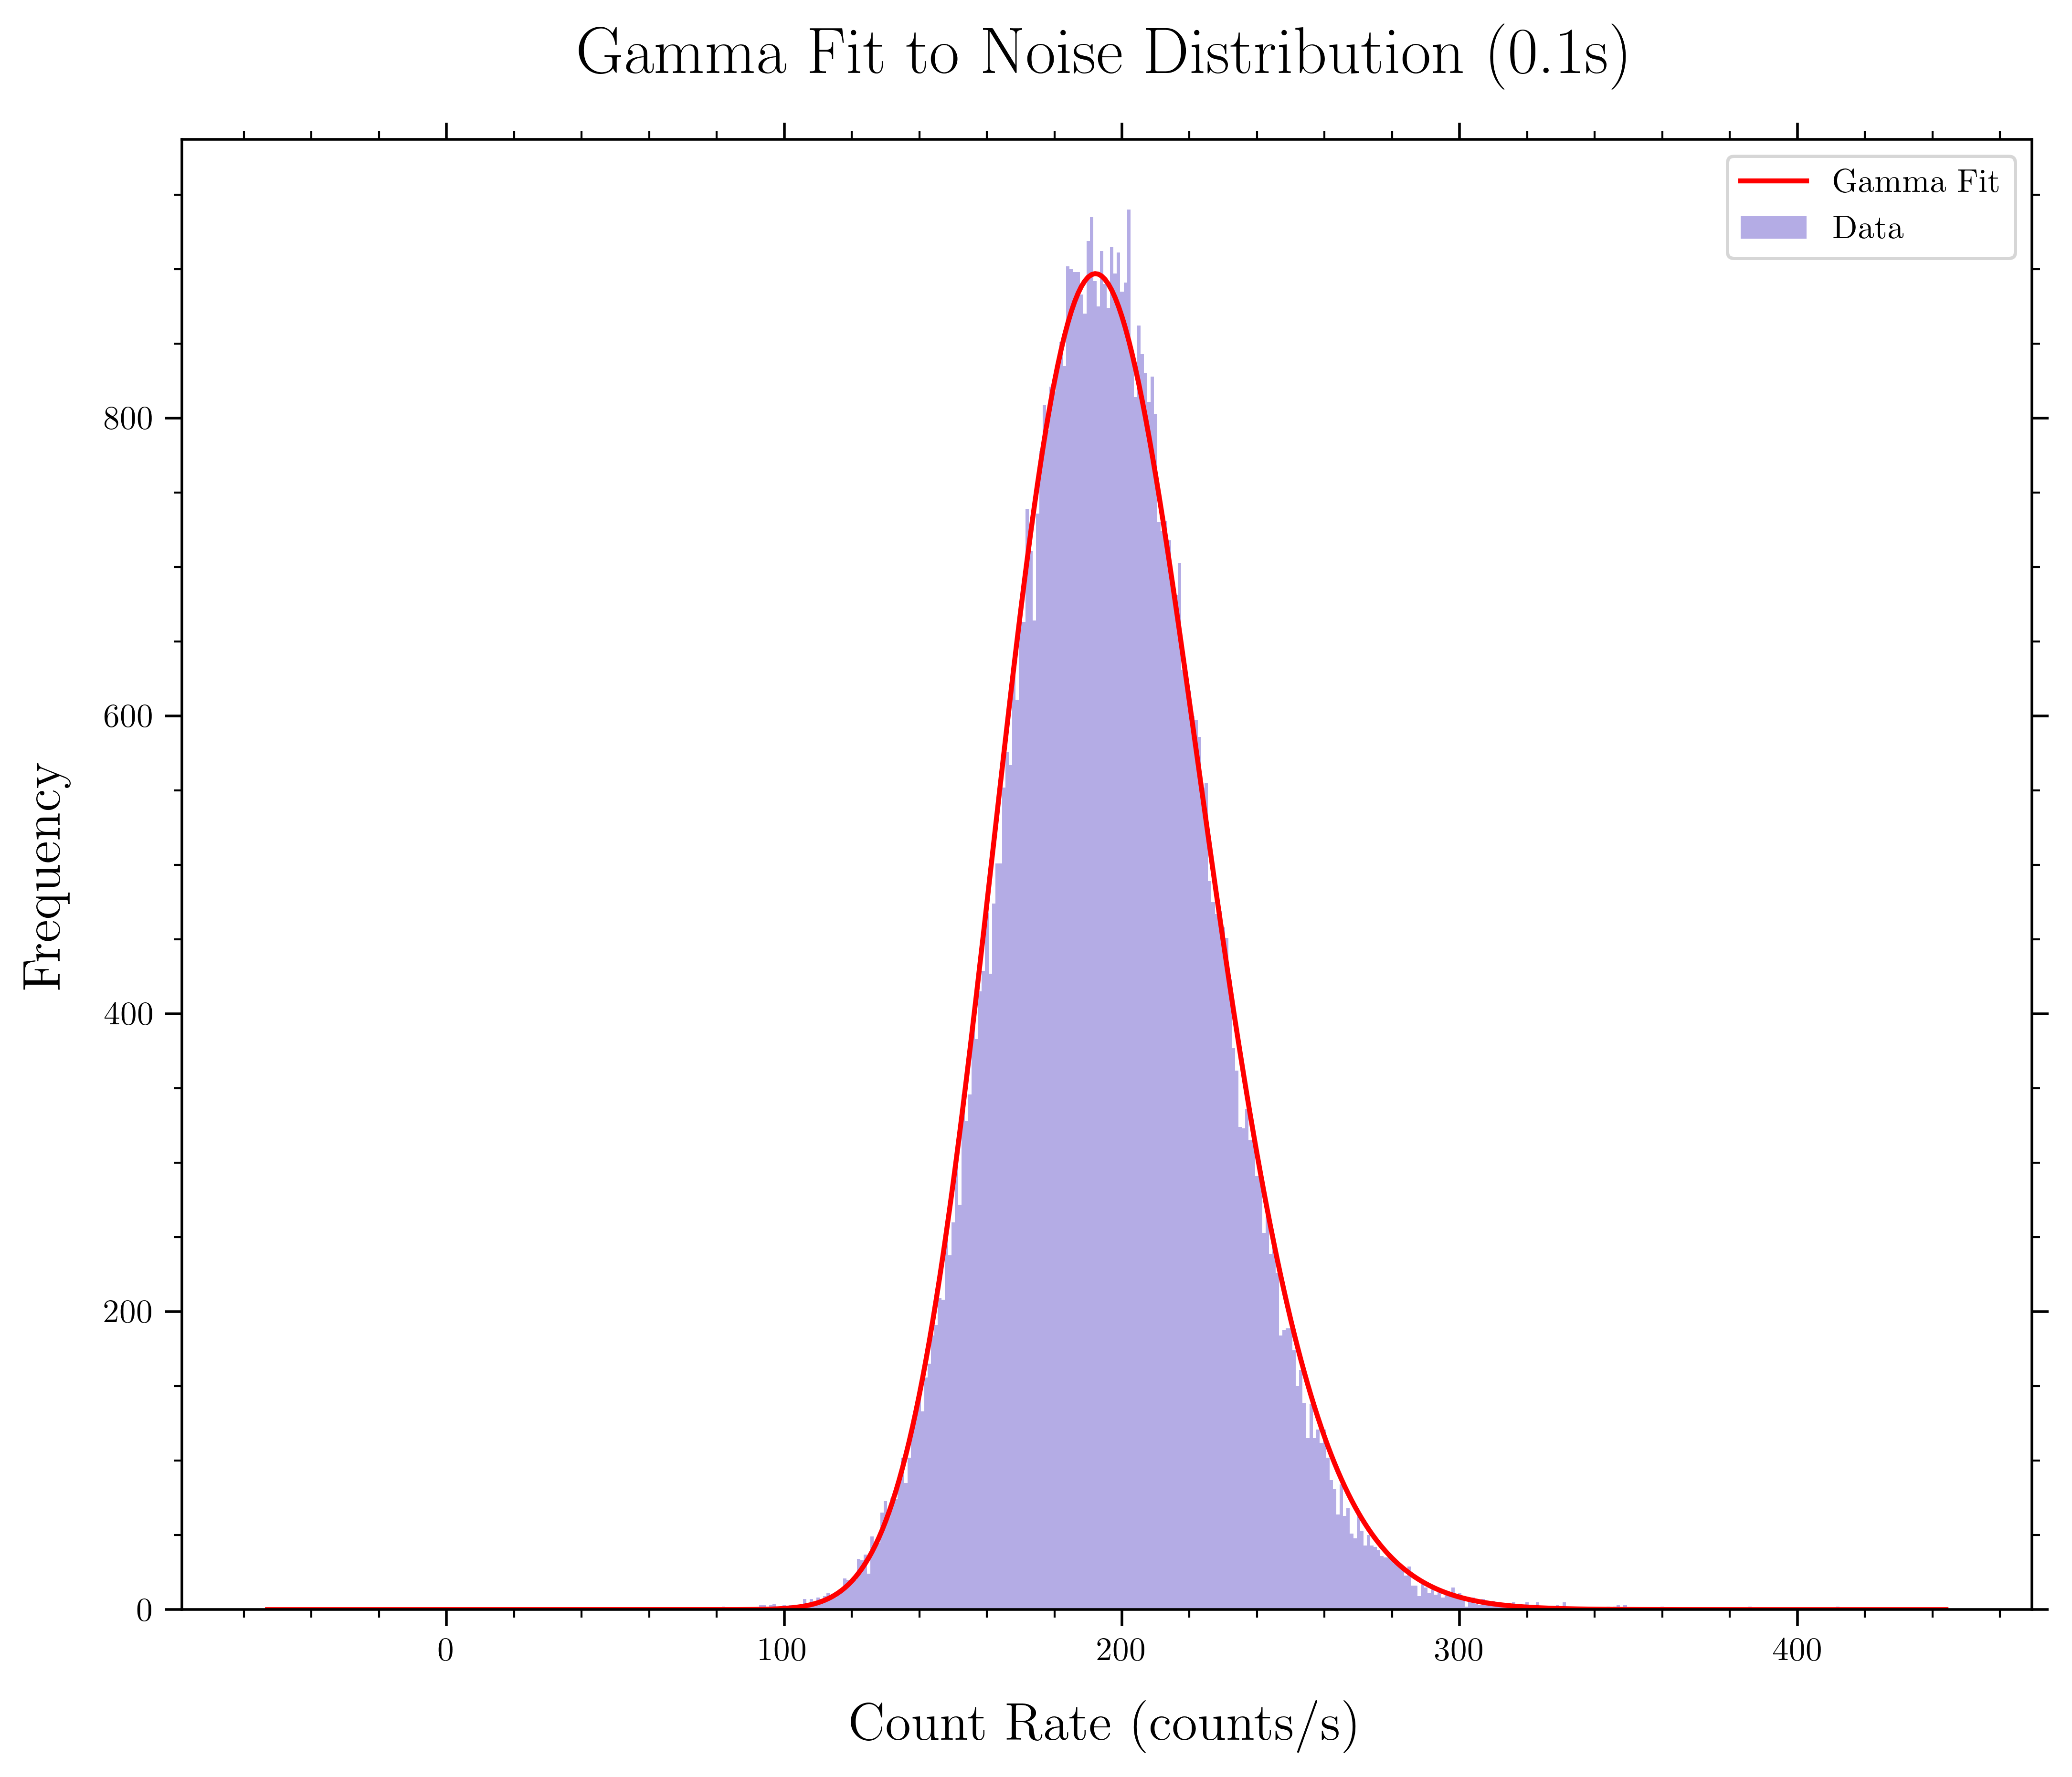

In [3]:
snr_gamma, n_gamma, bin_center_gamma, gamma_fit, _ = pf.snr_gamma(lc1, start, end, 3, 500, 11)

plt.figure(figsize=(10, 8), dpi=500)
plt.bar(bin_center_gamma, n_gamma, width=1, color='slateblue', alpha=0.5, label='Data')
plt.plot(bin_center_gamma, gamma_fit, color='r', label='Gamma Fit')
plt.xlabel('Count Rate (counts/s)', fontsize=16, labelpad=10)
plt.ylabel('Frequency', fontsize=16, labelpad=10)
plt.title('Gamma Fit to Noise Distribution (0.1s)', fontsize=20, pad=20)
plt.legend()
plt.show()

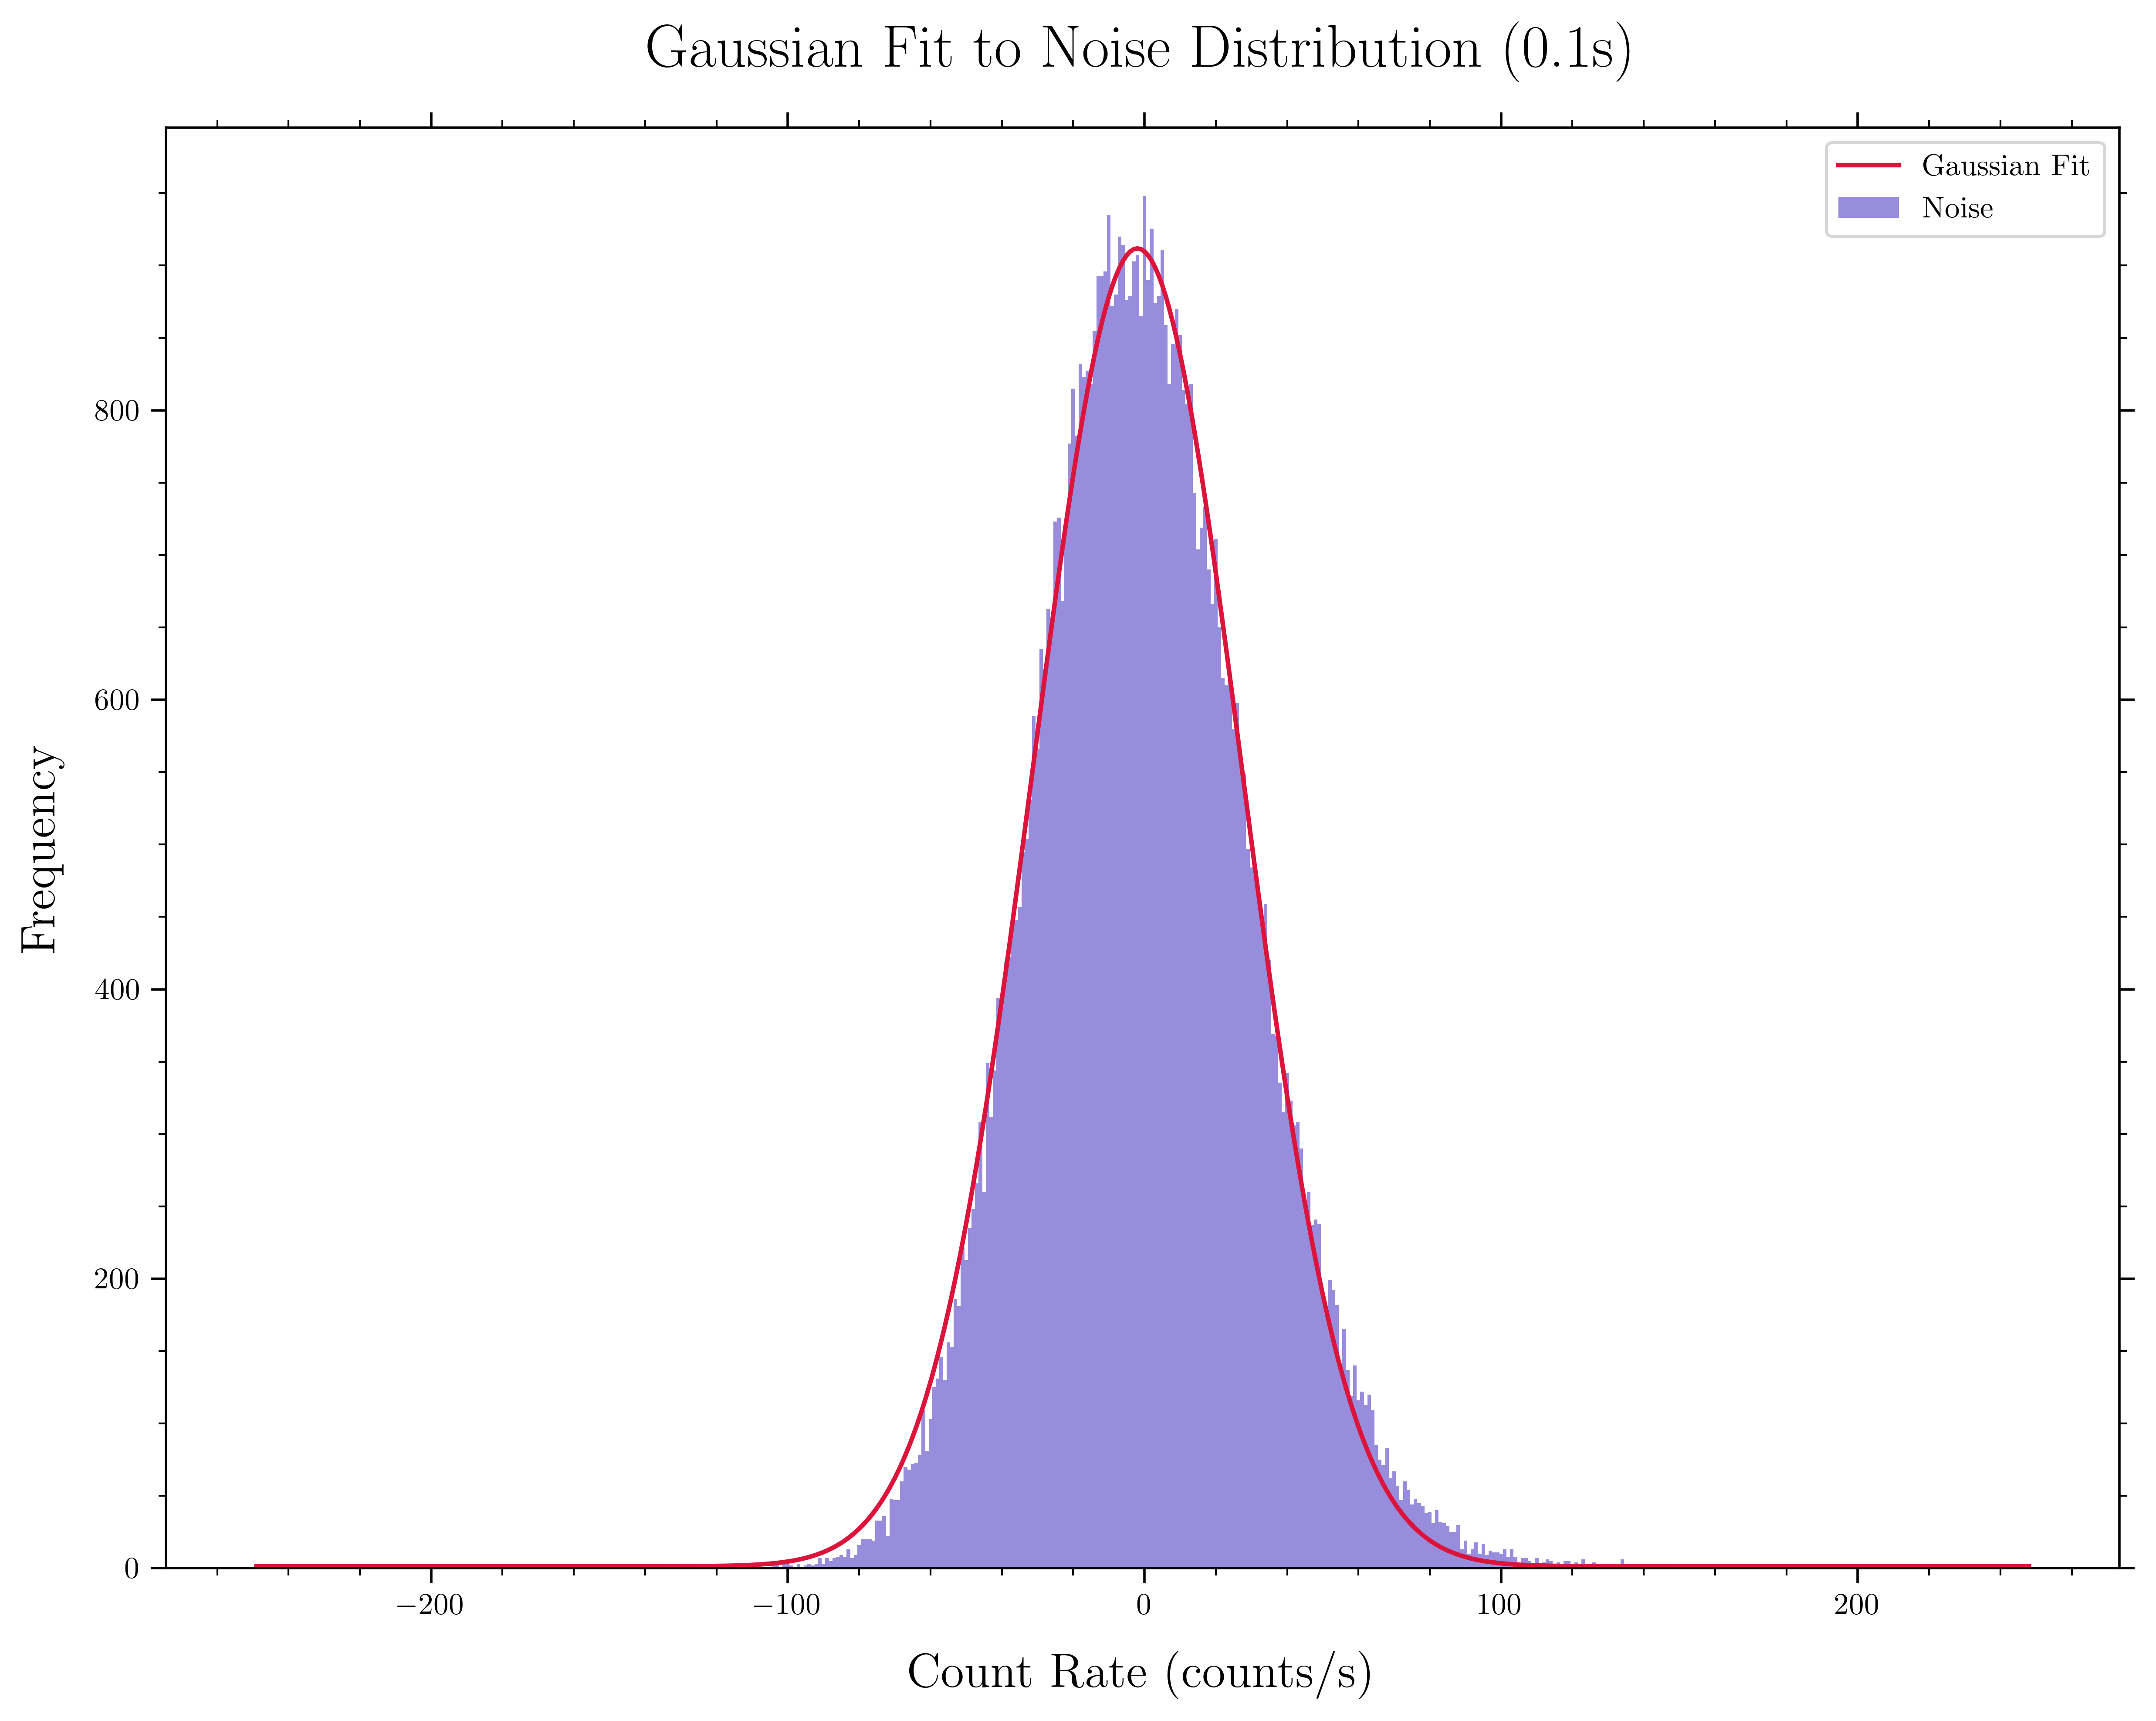

In [4]:
snr_gauss, n_gauss, bin_center_gauss, popt_gauss = pf.snr_gauss(lc1, start, end, 3, 500, 11)
gaussian_fit = pf.gaussian(bin_center_gauss, *popt_gauss)
plt.figure(figsize=(10, 8), dpi=500)
plt.plot(bin_center_gauss, gaussian_fit, label='Gaussian Fit', color='crimson')
plt.bar(bin_center_gauss, n_gauss, label='Noise', color='slateblue', alpha=0.69, width=1)
plt.title('Gaussian Fit to Noise Distribution (0.1s)', fontsize=20, pad=20)
plt.xlabel('Count Rate (counts/s)', fontsize=16, labelpad=10)
plt.ylabel('Frequency', fontsize=16, labelpad=10)
plt.legend(['Gaussian Fit', 'Noise'])
plt.tight_layout()
plt.show()

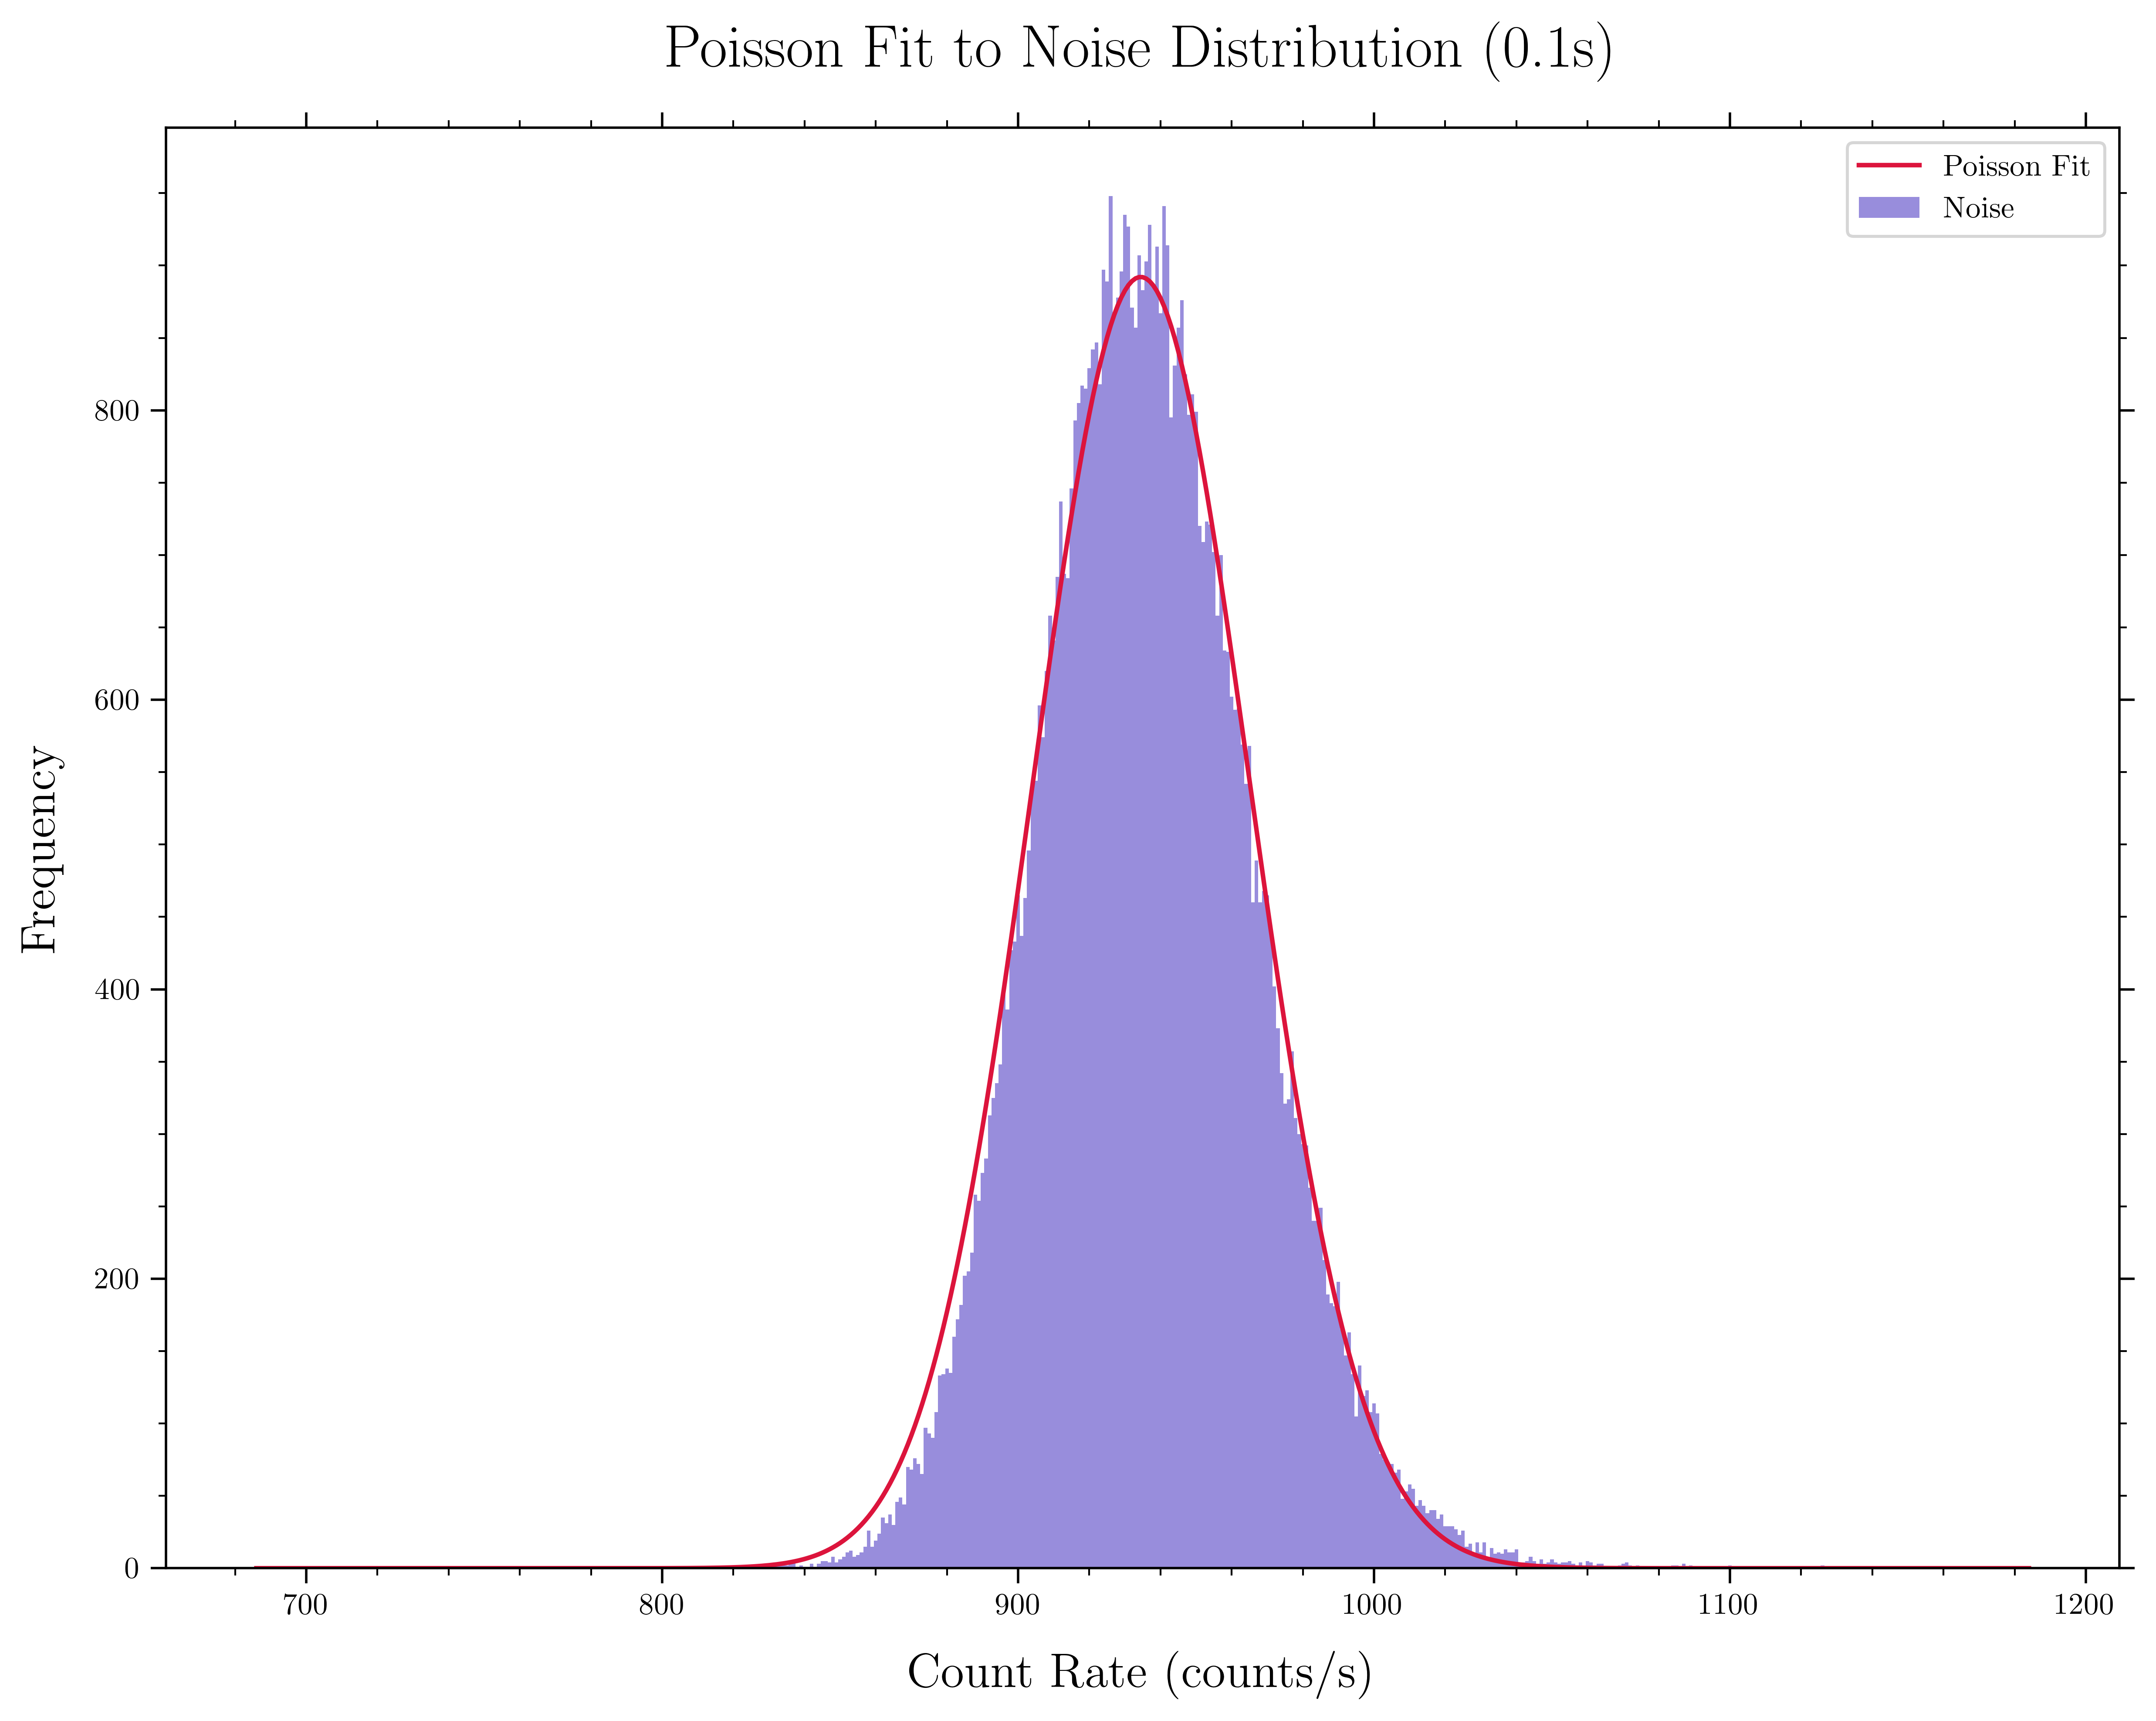

In [6]:
snr_poisson, n_poisson, bin_center_poisson, popt_poisson = pf.snr_poisson(lc1, start, end, 3, 500, 11)

poisson_fit = pf.poisson_fit(bin_center_poisson, *popt_poisson)
plt.figure(figsize=(10, 8), dpi=500)
plt.plot(bin_center_poisson, poisson_fit, label='Poisson Fit', color='crimson')
plt.bar(bin_center_poisson, n_poisson, label='Noise', color='slateblue', alpha=0.69, width=1)
plt.title('Poisson Fit to Noise Distribution (0.1s)', fontsize=20, pad=20)
plt.xlabel('Count Rate (counts/s)', fontsize=16, labelpad=10)
plt.ylabel('Frequency', fontsize=16, labelpad=10)
plt.legend(['Poisson Fit', 'Noise'])
plt.tight_layout()
plt.show()

In [6]:
data, south_atlantic_start, south_atlantic_end = pf.filter_and_detrend(lc1, start, end, 3)
if end<south_atlantic_start:
    total_noise = np.concatenate((data['RATE'][:start], data['RATE'][end:south_atlantic_start], data['RATE'][south_atlantic_end:]))
elif start>south_atlantic_end:
    total_noise = np.concatenate((data['RATE'][:south_atlantic_start], data['RATE'][south_atlantic_end:start], data['RATE'][end:]))
else:
    print('Inputted start and end times are not valid')

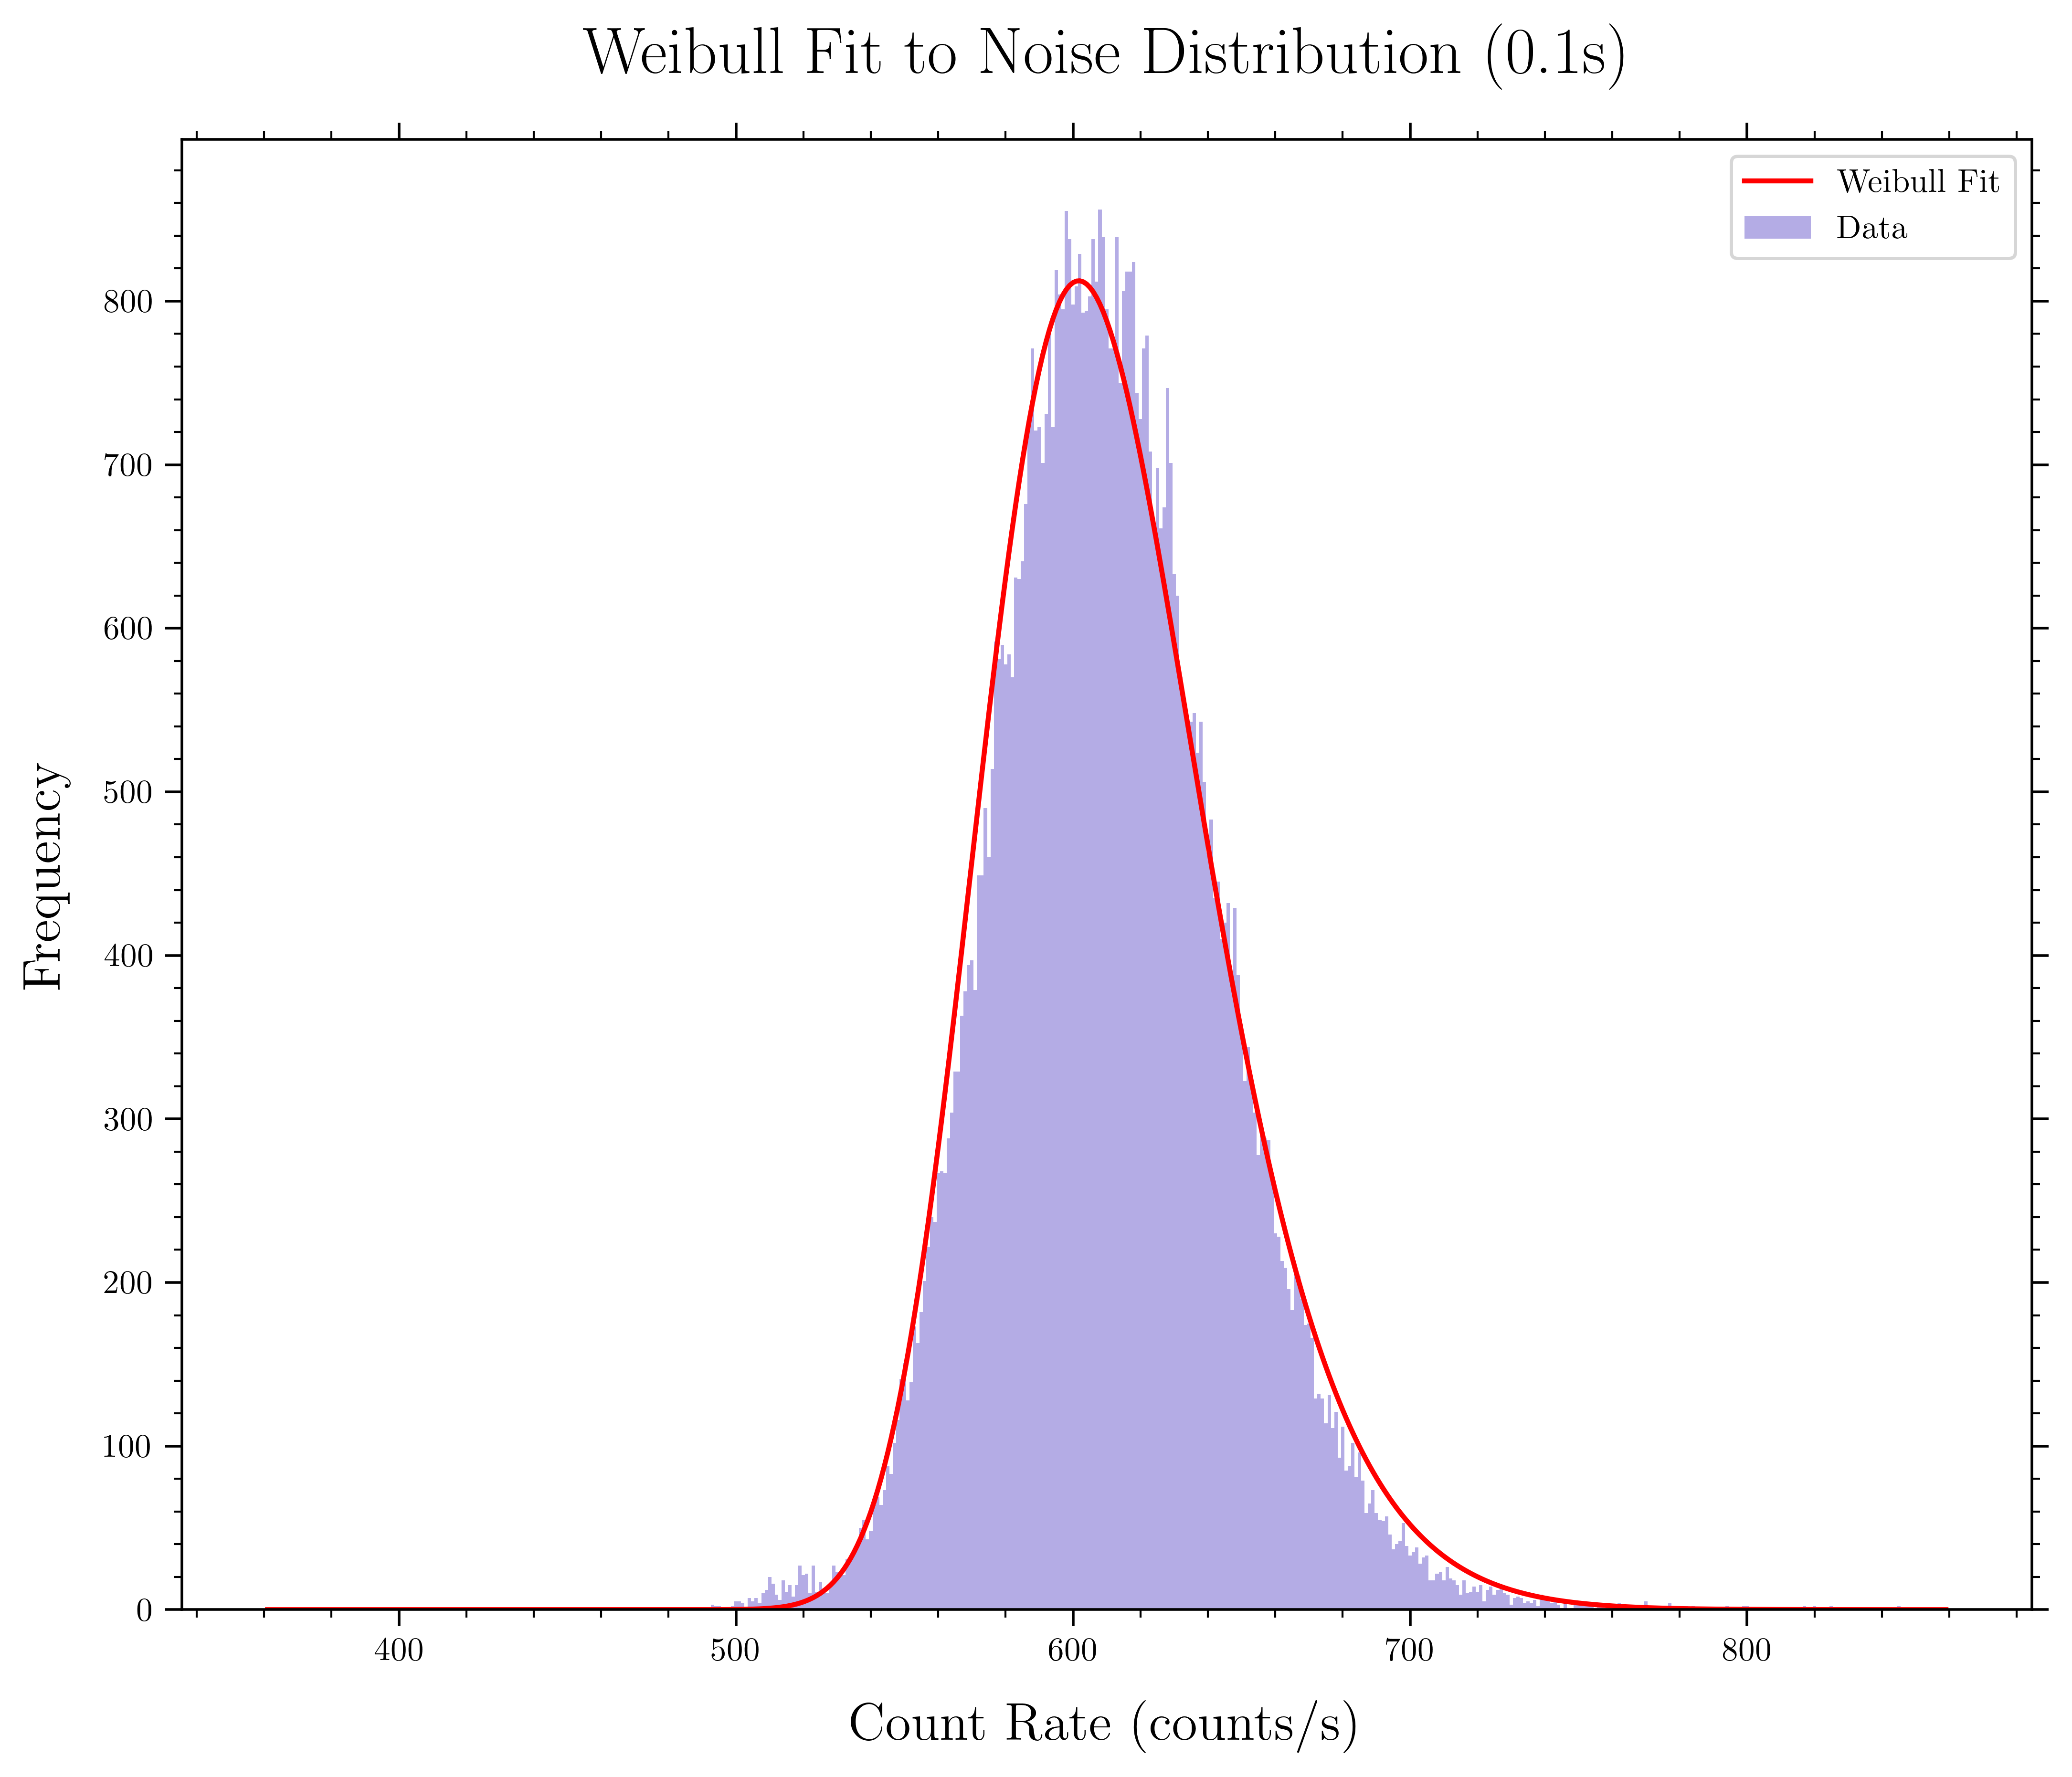

In [7]:
snr_weibull, n_weibull, bin_center_weibull, weibull_fit, _ = pf.snr_weibull(lc1, start, end, 3, 500)

plt.figure(figsize=(10, 8), dpi=500)
plt.bar(bin_center_weibull, n_weibull, width=1, color='slateblue', alpha=0.5, label='Data')
plt.plot(bin_center_weibull, weibull_fit, color='r', label='Weibull Fit')
plt.title('Weibull Fit to Noise Distribution (0.1s)', fontsize=20, pad=20)
plt.xlabel('Count Rate (counts/s)', fontsize=16, labelpad=10)
plt.ylabel('Frequency', fontsize=16, labelpad=10)
plt.legend()
plt.show()

In [12]:
rmse_poisson = np.sqrt(np.mean((n_poisson-poisson_fit)**2))
rmse_gamma = np.sqrt(np.mean((n_gamma-gamma_fit)**2))
rmse_gauss = np.sqrt(np.mean((n_gauss-gaussian_fit)**2))
rmse_exponweib = np.sqrt(np.mean((n_weibull-weibull_fit)**2))



print(f"RMSE for poisson fit: {rmse_poisson}")
print(f"RMSE for gamma fit: {rmse_gamma}")
print(f"RMSE for gaussian fit: {rmse_gauss}")
print(f"RMSE for exponential weibull fit: {rmse_exponweib}")
print(f"SNR for poisson fit: {snr_poisson}")
print(f"SNR for gamma fit: {snr_gamma}")
print(f"SNR for gaussian fit: {snr_gauss}")
print(f"SNR for weibull fit: {snr_weibull}")

1.922715214533646
1.850868523789079
1.8626832304549126
1.9182826991518258
1.710672560713908
RMSE for poisson fit: 16.511879036102435
RMSE for gamma fit: 13.122919902754788
RMSE for gaussian fit: 14.352484594711635
RMSE for exponential weibull fit: 21.439295871231646
SNR for poisson fit: 2.113317763950046
SNR for gamma fit: 4.958321523939452
SNR for gaussian fit: 14.371849360524116
SNR for weibull fit: 2.5738132705419297


In [9]:
fig, ax = plt.subplots(2,2, figsize=(15, 15), dpi=500)

ax[0,0].bar(bin_center_poisson, n_poisson, label='Noise', color='slateblue', alpha=0.5, width=1)
ax[0,0].plot(bin_center_poisson, poisson_fit, label='Poisson Fit', color='crimson')
ax[0,0].set_title('Poisson Fit to Noise Distribution (0.1s)', fontsize=20, pad=20)
ax[0,0].set_xlabel('Count Rate (counts/s)', fontsize=16, labelpad=10)
ax[0,0].set_ylabel('Frequency', fontsize=16, labelpad=10)
ax[0,0].legend(['Poisson Fit', 'Noise'])

ax[0,1].bar(bin_center_gamma, n_gamma, width=1, color='slateblue', alpha=0.5, label='Data')
ax[0,1].plot(bin_center_gamma, gamma_fit, color='crimson', label='Gamma Fit')
ax[0,1].set_xlabel('Count Rate (counts/s)', fontsize=16, labelpad=10)
ax[0,1].set_ylabel('Frequency', fontsize=16, labelpad=10)
ax[0,1].set_title('Gamma Fit to Noise Distribution (0.1s)', fontsize=20, pad=20)
ax[0,1].legend()

ax[1,0].bar(bin_center_gauss, n_gauss, label='Noise', color='slateblue', alpha=0.5, width=1)
ax[1,0].plot(bin_center_gauss, gaussian_fit, label='Gaussian Fit', color='crimson')
ax[1,0].set_title('Gaussian Fit to Noise Distribution (0.1s)', fontsize=20, pad=20)
ax[1,0].set_xlabel('Count Rate (counts/s)', fontsize=16, labelpad=10)
ax[1,0].set_ylabel('Frequency', fontsize=16, labelpad=10)
ax[1,0].legend(['Gaussian Fit', 'Noise'])

ax[1,1].bar(bin_center_weibull, n_weibull, width=1, color='slateblue', alpha=0.5, label='Data')
ax[1,1].plot(bin_center_weibull, weibull_fit, color='crimson', label='Weibull Fit')
ax[1,1].set_xlabel('Count Rate (counts/s)', fontsize=16, labelpad=10)
ax[1,1].set_ylabel('Frequency', fontsize=16, labelpad=10)
ax[1,1].set_title('Weibull Fit to Noise Distribution (0.1s)', fontsize=20, pad=20)
ax[1,1].legend()

plt.tight_layout()